<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QFT_04_Gemini_mkbahk_20250423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-h3smmjlh
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-h3smmjlh
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [64]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

In [113]:
# 1. 양자 회로 생성
n_qubits = 3
qc = QuantumCircuit(n_qubits, n_qubits)
qc.x(2) # 초기 상태: |001⟩


In [116]:
# 2. QFT 알고리즘 구현
def qft(circuit, n):
    for j in range(n):
        circuit.h(j)
        for k in range(j + 1, n):
            angle = np.pi / (2**(k - j))
            circuit.cp(angle, k, j)
        ###for
    ###for

    for i in range(n // 2):
        circuit.swap(i, n - 1 - i)
    ###for
###def

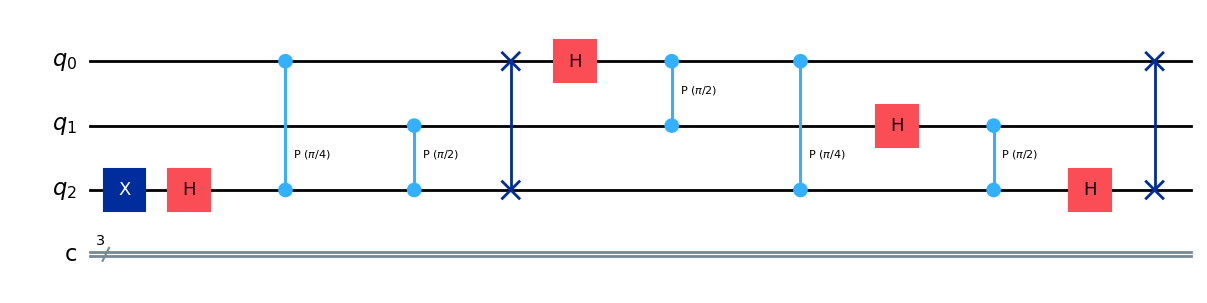

In [117]:
qft(qc, n_qubits)

# 회로 시각화
qc.draw('mpl')

In [118]:
# 3. 결과 측정
qc.measure(range(n_qubits), range(n_qubits))

In [121]:
# 4. Aer 시뮬레이터 설정 및 실행
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("측정 결과:", counts)

측정 결과: {'101': 267, '100': 264, '110': 252, '111': 241}


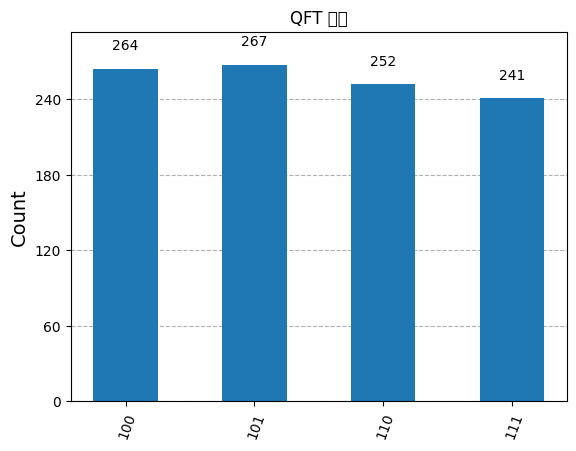

In [122]:
# 5. 결과 시각화 (선택 사항)
plot_histogram(counts, title='QFT 결과')

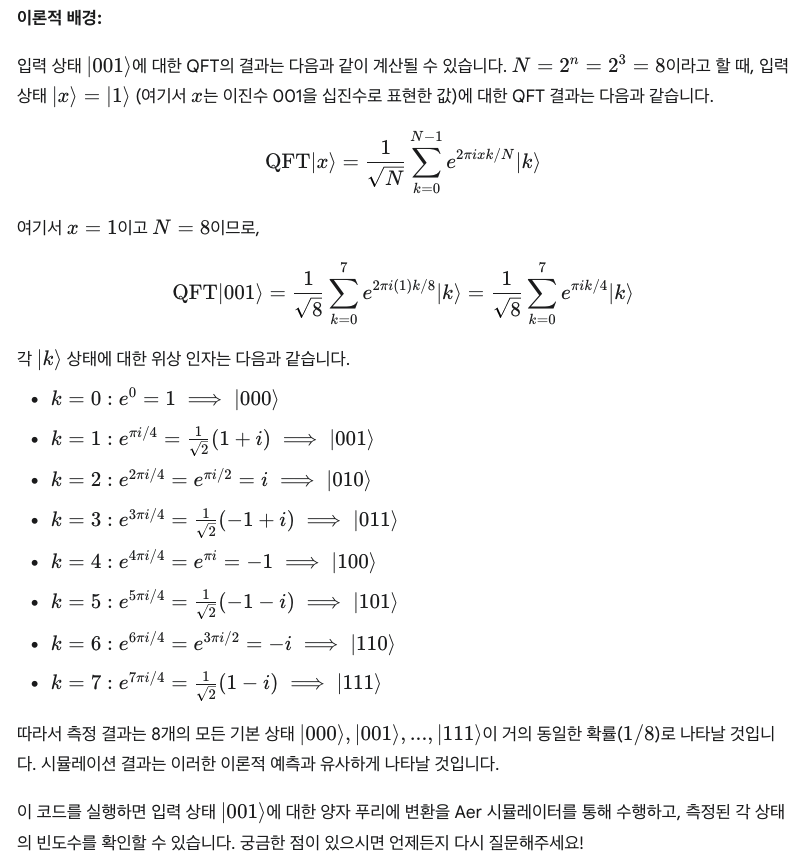